# Customer Churn Analytics
by Xiang Ou

## Content:
### [Business Understanding](#B)
### [Data Understanding](#D)
### [Data Preparation](#P)
### [Modeling](#M)
### [Model Evaluation](#E)
### [Model Improvement](#I)
### [Prediction](#p)
### [Summary](#S)
### [Recommendations](#R)

# <span id="B">Buniess Understanding:</span>

The objective of this project is to find the best model to predict customer churn based on the historical data from a Telcompany, and this model will be able to map the new data ingest from the business.

What is Customer Churn? Customer Churn is also known as customer attrition, is when a customer stops buying from a brand or discontinues the subscription. Customer churn is measured by a customer churn rate, a business metric that calculates the percentage of customers who stop doing business with a company over a given period. Understanding customer churn is essential to evaluate the health of the business.

Customer Churn Rate = (Customers lost during the period/Total customers at the start of the period)*100

Through the dataset analytics, I will attempt to find the best model to accurately predict the Customer Churn and solve some of the key business challenges regarding customer attrition, such as 

(1) Detect customers who are highly likely to leave the organization? 

(2) what are key indicators of a customer churn? 

(3) what strategies can be implemented based on the results to prevent customer churn?


# <span id="D">Data Understanding:</span>

In [195]:
#import libary 
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn. ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


### EDA

In [196]:
df=pd.read_csv('Customer_Churn_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [197]:
df.shape

(7043, 21)

This dataset contains 7043 rows and 21 columns.

In [198]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


What are the features in the dataset

In [199]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [200]:
data_index = np.where(df.dtypes == object)
cols=df.columns[data_index][1:]
for i in (cols):
    print(i,df[i].unique() )

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


Look into the columns have 2 or more than 2 values.

# <span id="P">Data Preparation:</span>

### Check missing data

In [201]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

 This dataset seems to be complete without any missing value.

### Processing Data

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data type of TotalCharges should be coverted to float64. 

In [203]:
# replace blanks with np.nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# convert to float64
df['TotalCharges'] = df['TotalCharges'].astype('float64')


There is missing value in TotalCharges,  fill missing value, convert the datatype to float, and check the dataset again to make sure there is no missing value.

In [204]:
df1=df.fillna(0)
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Plot contract types.

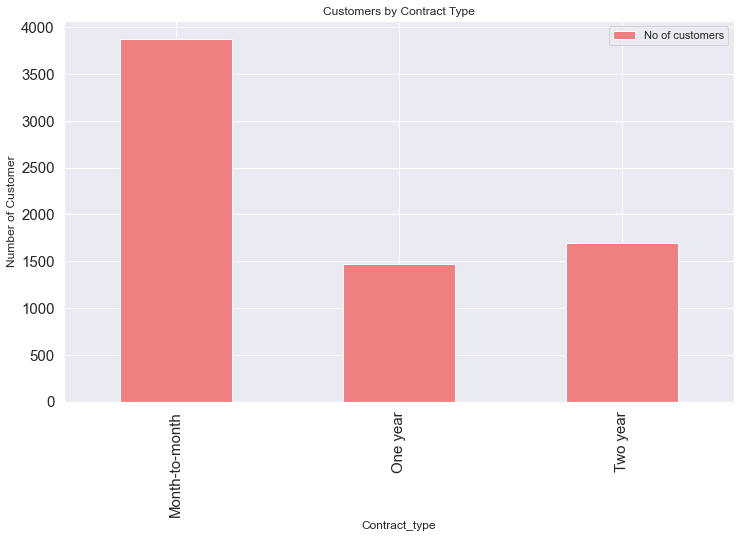

In [205]:
contract=df[['customerID','Contract' ]]
contract_dis=pd.DataFrame(contract.groupby('Contract')['customerID'].count())
contract_dis.rename(columns={'customerID':'No of customers'}, inplace=True)
contract_dis.plot(kind='bar', figsize=(12,7), title='Customers by Contract Type',fontsize=15,xlabel='Contract_type',ylabel='Number of Customer', color='lightcoral')
plt.show()

Most of customers are in Month to month contract.

#### Plot payment method

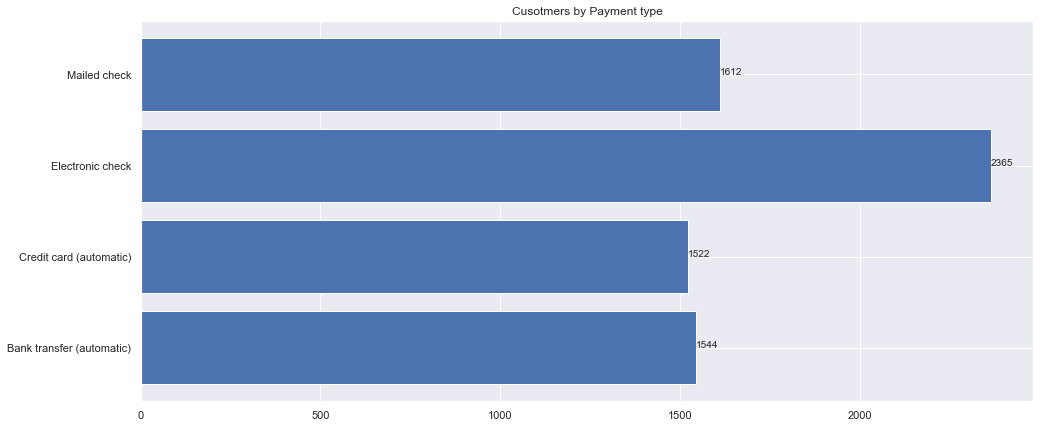

In [206]:
Payment=df[['customerID','PaymentMethod' ]]
Payment_dis=pd.DataFrame(Payment.groupby('PaymentMethod')['customerID'].count()).reset_index()

Payment_dis.rename(columns={'customerID':'No of customers'}, inplace=True)
x=Payment_dis.iloc[:,0]
y=Payment_dis.iloc[:,1]
plt.figure(figsize=(16,7))
plt.title('Cusotmers by Payment type')
plt.barh(x,y)
  
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

  
plt.show()

Most of customer pay via Electronic check.

#### Plot Churn rate

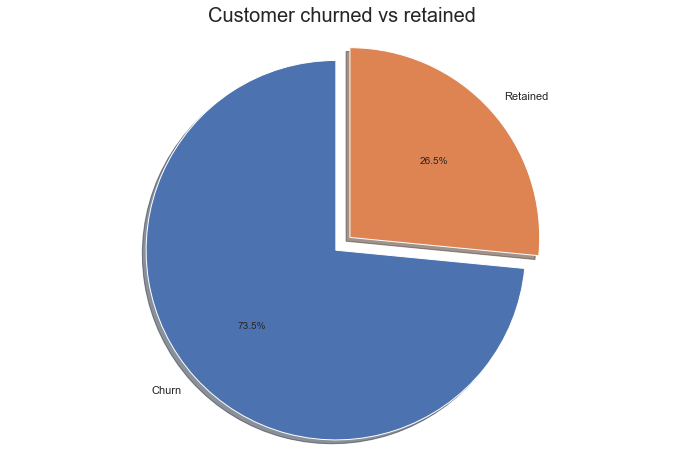

In [207]:
labels = 'Churn', 'Retained'
sizes = [df.Churn[df['Churn']=="No"].count(), df.Churn[df['Churn']=='Yes'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Customer churned vs retained", size = 20)
plt.show()

Based on above pie chart, the Churn rate is 73.5%.

#### Plot senior citzen with churn 

In [208]:
crosstable=pd.crosstab(df['SeniorCitizen'],df['Churn'])
crosstable

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


(<Figure size 720x432 with 3 Axes>,
 {('No', '0'): (0.0, 0.0, 0.7309752529415962, 0.86838485810088),
  ('No', '1'): (0.0,
   0.8717071172370926,
   0.7309752529415962,
   0.12829288276290732),
  ('Yes', '0'): (0.7359503773197057,
   0.0,
   0.26404962268029447,
   0.7428422113554071),
  ('Yes', '1'): (0.7359503773197057,
   0.7461644704916196,
   0.26404962268029447,
   0.25383552950838023)})

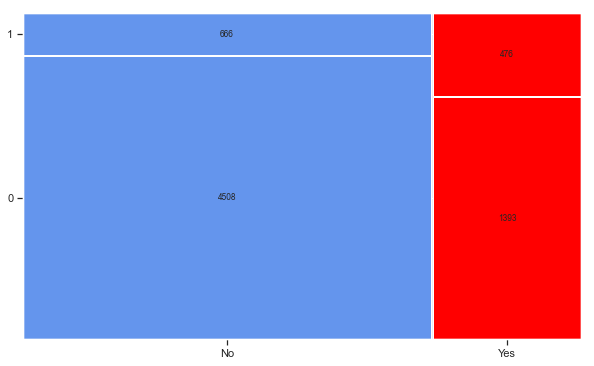

In [209]:

props={}
props[('Yes','0')]={'facecolor':'red', 'edgecolor':'white'}
props[('No','0')]={'facecolor':'cornflowerblue', 'edgecolor':'white'}
props[('Yes','1')]={'facecolor':'red','edgecolor':'white'}
props[('No','1')]=        {'facecolor':'cornflowerblue','edgecolor':'white'}
labelizer=lambda k:{('Yes','0'):1393,('Yes','1'):476,('No','0'):4508,('No','1'):666}[k]
plt.rcParams["figure.figsize"]=(10,6)
mosaic(df,['Churn','SeniorCitizen'],labelizer=labelizer,properties=props)

Based on above mosaic chart, majority customers are not senior citizen,  senior citizen customers have higher probabilities than non senior citzen to churn.

In [210]:
df[['SeniorCitizen', 'TechSupport']].value_counts()


SeniorCitizen  TechSupport        
0              No                     2643
               Yes                    1784
               No internet service    1474
1              No                      830
               Yes                     260
               No internet service      52
dtype: int64

Most of Senior Citizens do not have tech support, this could lead to churn. 

#### Covert catergorical variables with 2 or less unique values  to numerical variables.

In [211]:
le = LabelEncoder()
le_count = 0
for col in df1.columns[1:]:
    if df1[col].dtype == 'object':
        if len(list(df1[col].unique())) <= 2:
            le.fit(df1[col])
            df1[col] = le.transform(df1[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [212]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### Plot features corrletions with Churn

Text(0.5, 1.0, 'Correlation Heatmap')

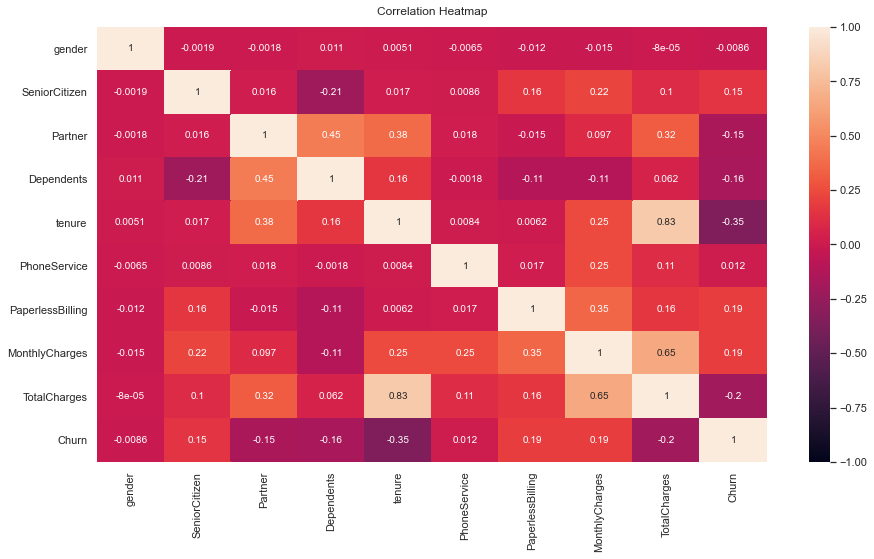

In [213]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

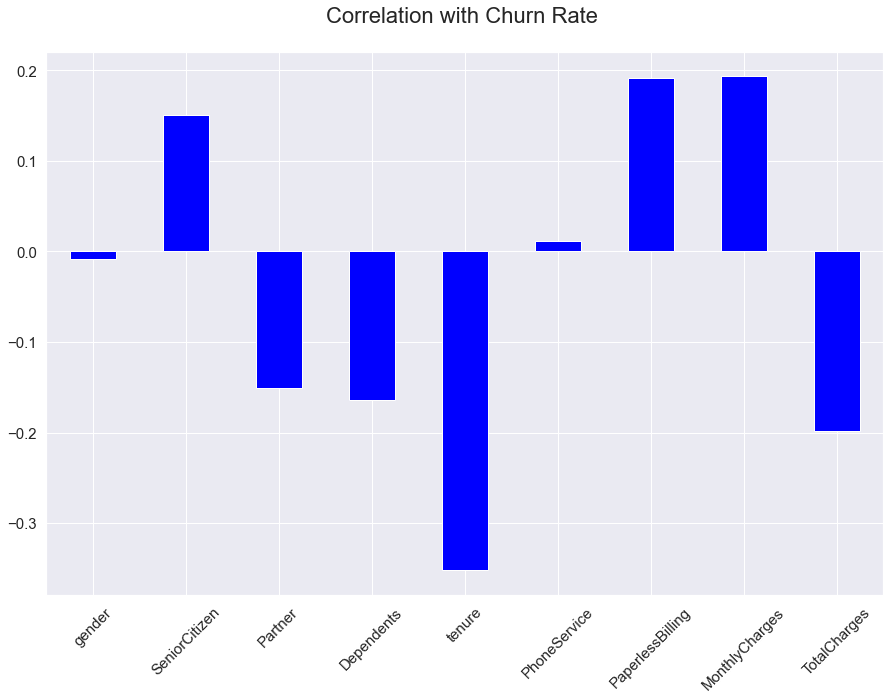

In [214]:
data=df1.iloc[:,1:].drop("Churn",axis=1)
corr = data.corrwith(df1.Churn)
corr = corr[corr!=1]
corr.plot.bar(
        figsize = (15, 10), 
        fontsize = 15, 
        color = 'blue',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Based on above heatmap and bar chart, A strong positive correlation with the churn is Monthly Charges, Paperlessbilling, SeniorCitizen whilst negative correlation is with Tenure, Partner, and Dependents.

#### Plot tenure, MonthlyCharges,TotalCharges with churn

In [215]:
def distribution1(df1_select):
    s=sns.FacetGrid(df1, hue='Churn', aspect=2.8, palette={1:'blue',0:'pink'})
    s.map(sns.kdeplot, df1_select, shade = True, alpha=0.5)
    s.set(xlim=(0, df1[df1_select].max() ))
    s.add_legend()
    s.set_axis_labels(df1_select, 'proportion')
    s.fig.suptitle(df1_select)
    plt.show()

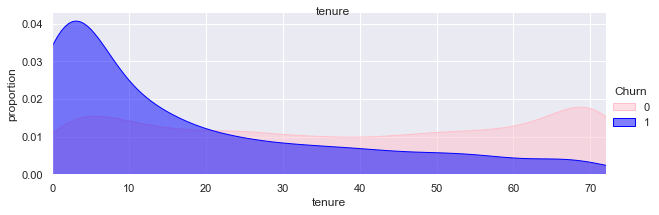

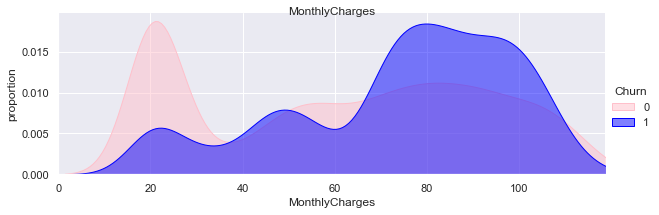

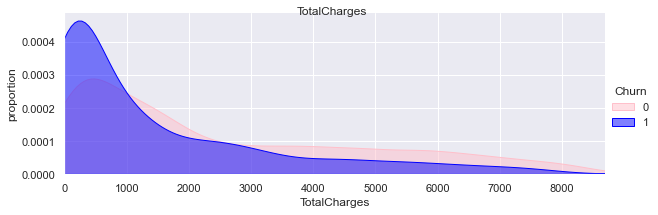

In [216]:
distribution1('tenure')
distribution1('MonthlyCharges')
distribution1('TotalCharges')

The above plots show short tenure has a high probability to churn, in other words, customers with a prepaid or a month-to-month contract have a very high chance to churn compared to customers on 1 or 2 years contracts. High monthly charges cause churn too. When Total charges are low, the churn rate turns high, which reflects the high churn rate in the free trial period or month-to-month contract.

#### Plot PaymentMethod, Contract with Churn

In [217]:
def distribution2(feature):

    sns.set_context('paper')
    plt.rcParams["figure.figsize"]=(10,6)
    sns.countplot(x = feature, hue='Churn',data = df1,
              palette = "rocket_r")

    plt.title(feature)

    plt.show()

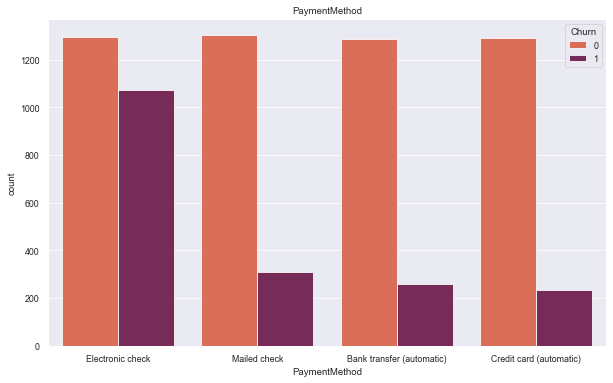

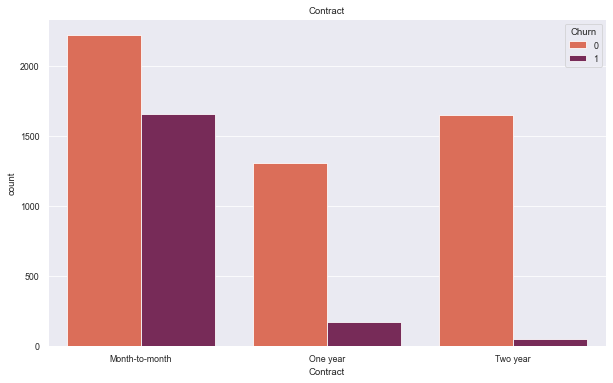

In [218]:
distribution2('PaymentMethod')
distribution2('Contract')


Based on above plot, Customers using Electornic check has high chance to churn. Customers with Month-to-month contract are high likely to churn.

Dummy covert catergoical variables to numberical variables

In [219]:

data_index = np.where(df1.dtypes == object)
object_data = df1[df1.columns[data_index]].drop("customerID", axis=1)
#object_data = df1[df1.columns[data_index]]
new_data = pd.get_dummies(object_data)
data_index1=np.where(df1.dtypes!=object)
data=df1[df1.columns[data_index1]]
new_df = pd.concat([new_data,data], axis = 1)
new_df.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,34,1,0,56.95,1889.50,0
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,2,1,1,53.85,108.15,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,45,0,0,42.30,1840.75,0
4,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,2,1,1,70.70,151.65,1


### Normalization Data

In [220]:
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [221]:
Norm_new_data = normalization(new_df)
Norm_new_data.shape

(7043, 41)

# <span id="M">Modeling:</span>

In [222]:
data=pd.concat([df1.customerID,Norm_new_data], axis = 1)
x=data.drop('Churn', axis=1)
y=data.iloc[:,-1]


### Split dataset

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [224]:
x_test_new=x_test.drop('customerID',axis=1)
x_train_new=x_train.drop('customerID',axis=1)


### Compare and select model 

The objective to predict a customer Churn or not churn, there are several machine learning methods are good for classification problem. I will compare LogisticRegression, Naive Bayes, support vector machines, KNN and random forests.

In [225]:
# logisticRegression
log=LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')
log.fit(x_train_new, y_train)
y_pred=log.predict(x_test_new)
acc_log=round(accuracy_score(y_test, y_pred),2)
pre_log = round(precision_score(y_test, y_pred),2)
rec_log = round(recall_score(y_test, y_pred),2)
f1_log =round(f1_score(y_test, y_pred, average='weighted'),2)

# RandomForest
forest=RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
forest.fit(x_train_new, y_train)
y_pred=forest.predict(x_test_new)
acc_forest=round(accuracy_score(y_test, y_pred), 2)
pre_forest = round(precision_score(y_test, y_pred),2)
rec_forest = round(recall_score(y_test, y_pred),2)
f1_forest =round(f1_score(y_test, y_pred, average='weighted'),2)
#knn
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train_new, y_train)
y_pred=knn.predict(x_test_new)
acc_knn=round(accuracy_score(y_test, y_pred),2)
pre_knn = round(precision_score(y_test, y_pred),2)
rec_knn = round(recall_score(y_test, y_pred),2)
f1_knn =round(f1_score(y_test, y_pred, average='weighted'),2)
#Navie_Byes
Navie_Byes=GaussianNB()
Navie_Byes.fit(x_train_new, y_train)
y_pred=Navie_Byes.predict(x_test_new)
acc_navie=round(accuracy_score(y_test, y_pred),2)
pre_navie = round(precision_score(y_test, y_pred),2)
rec_navie = round(recall_score(y_test, y_pred),2)
f1_navie =round(f1_score(y_test, y_pred, average='weighted'),2)

#SVM
SVM=SVC(kernel = 'linear', random_state = 0)
SVM.fit(x_train_new, y_train)
y_pred=SVM.predict(x_test_new)
acc_svm=round(accuracy_score(y_test, y_pred),2)
pre_svm = round(precision_score(y_test, y_pred),2)
rec_svm = round(recall_score(y_test, y_pred),2)
f1_svm=round(f1_score(y_test, y_pred, average='weighted'),2)
# Models accuracy score sort.
models=pd.DataFrame({'Model':['RandomForest', 'LogisticRegresion','KNN','navie_bayes','SVM'],'Accuracy':[acc_forest,acc_log,acc_knn,acc_navie, acc_svm],'Precision':[pre_forest,pre_log, pre_knn,pre_navie,pre_svm],"Recall":[rec_forest,rec_log,rec_knn,rec_navie,rec_svm],"F1_score":[f1_forest,f1_log,f1_knn,f1_navie,f1_svm]})
#models.sort_values(by='Acc_Score', ascending=False)
models= models.sort_values(["Accuracy","Precision", 
"Recall", "F1_score"], ascending = False)
print(models)

               Model  Accuracy  Precision  Recall  F1_score
4                SVM      0.80       0.65    0.52      0.80
0       RandomForest      0.78       0.59    0.46      0.77
2                KNN      0.75       0.52    0.49      0.75
1  LogisticRegresion      0.74       0.50    0.79      0.75
3        navie_bayes      0.69       0.45    0.83      0.71


recall = TP / (TP + FN)

precision = TP / (TP + FP)

F1= 2 x precision * recall/precision + recall

F1 Score is needed when to seek a balance between Precision and Recall.
According to above result, SVM, KNN have better accuracy score, while,LogisticRegression and navie_bayes have  better Recall scores.


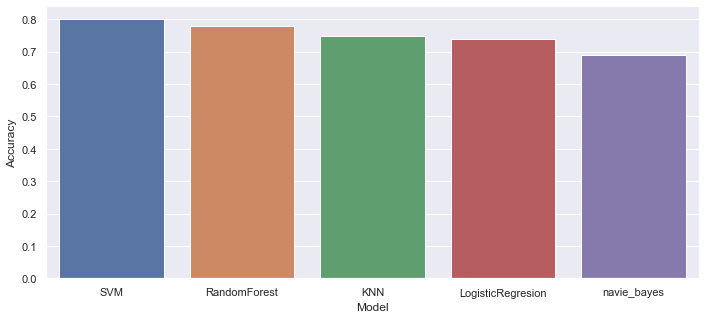

In [226]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,5)})
ax = sns.barplot(x="Model", y="Accuracy",data=models)

If only based on the accuracy score, SVM and RandomForest are the best two models. According to the above result, SVM and KNN have better accuracy, LogisticRegression, navie_bayes have the better Recall value. As we know, if there is a high cost associated with False Negative, for example, in this case, wrongly predict the customer want to churn to be safe, the consequence is losing more customers. Therefore, Recall shall be the model metric we use to select our best model when predicting customer churn.

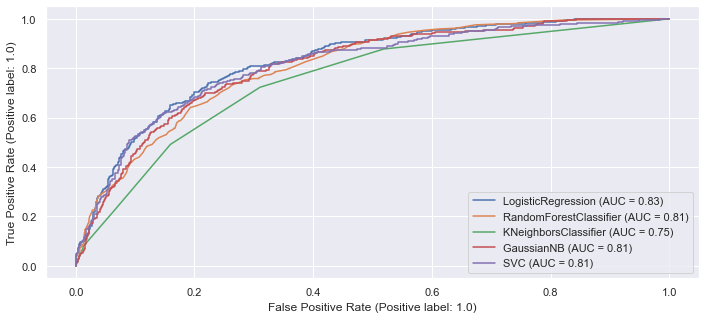

In [227]:
from sklearn.metrics import plot_roc_curve

classifiers = [log,forest,knn, Navie_Byes, SVM]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test_new, y_test, ax=ax)

Based on above chart, LogisticRegression has the highest AUC score, which means LogisticRegression comparing with other models has  better performance on distinguishing between the positive and negative classes.
Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.

#### Plot confusion_matrix of LogisticRegression

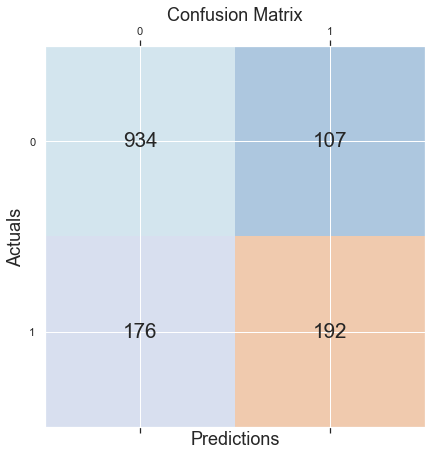

In [228]:
log=LogisticRegression()
log.fit(x_train_new, y_train)
y_pred=log.predict(x_test_new)
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.tab20, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Plot confusion_matrix of Navie Byes

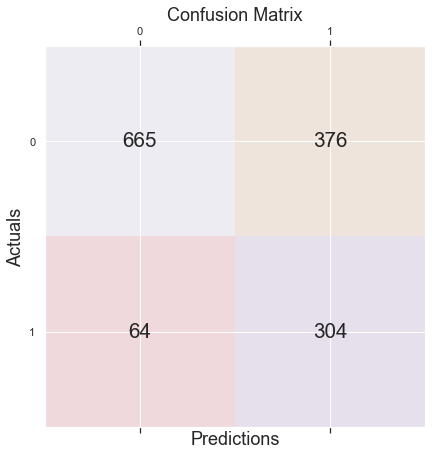

In [229]:
Navie_Byes=GaussianNB()
Navie_Byes.fit(x_train_new, y_train)
y_pred=Navie_Byes.predict(x_test_new)
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Pastel1, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

According to above confusion matrixs, Navie Byes has better perfromance than Logistic Regressionon on predicting actual churn. Navie Byes True postive is 304, while Logistic Regression only 192. 

# <span id="E">Model Evaluation:</span>

LogitsticRegression evaluation

In [230]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')
results = model_selection.cross_val_score(model, x_train_new, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:75.310%, Final standard deviation:(2.164%)
Variance of kfold accuracies: 0.0004683394105385166


SVM evaluation

In [231]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = SVC(kernel = 'linear', random_state = 0)
results = model_selection.cross_val_score(model, x_train_new, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:79.890%, Final standard deviation:(1.532%)
Variance of kfold accuracies: 0.00023481839756669194


KNN evaluation


In [232]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
model=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
results = model_selection.cross_val_score(model, x_train_new, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:75.488%, Final standard deviation:(2.270%)
Variance of kfold accuracies: 0.0005153502838813348


RandomForest evaluation

In [233]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
model=RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
results = model_selection.cross_val_score(model, x_train_new, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:79.339%, Final standard deviation:(1.614%)
Variance of kfold accuracies: 0.00026061928262685044


Navie Byes evaluation

In [234]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
model=GaussianNB()
results = model_selection.cross_val_score(model, x_train_new, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:70.411%, Final standard deviation:(2.246%)
Variance of kfold accuracies: 0.0005042452710992035


After comparison, I decided to sacrifice a little model accuracy and chose the Navie Bayes model for its high Recall score.

#  <span id="I">Model Improvement:</span>

### Feature Selection

In [235]:
Navie_Byes=GaussianNB()
Navie_Byes.fit(x_train_new, y_train)
y_pred=Navie_Byes.predict(x_test_new)
print('Training set score: {:.4f}'.format(Navie_Byes.score(x_train_new, y_train)))

print('Test set score: {:.4f}'.format(Navie_Byes.score(x_test_new, y_test)))

Training set score: 0.7036
Test set score: 0.6877


The training-set accuracy score is 0.7036, while the test-set accuracy to be 0.6877. there is a little overfitting. 

In [236]:

selector = SelectKBest(chi2, k=5)
selector.fit(x_train_new, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
x_train_f = x_train_new.iloc[:,cols]
x_test_f=x_test_new.iloc[:,cols]

In [237]:
Navie_Byes=GaussianNB()
Navie_Byes.fit(x_train_f, y_train)
y_pred=Navie_Byes.predict(x_test_f)
print('Training set score: {:.4f}'.format(Navie_Byes.score(x_train_f, y_train)))

print('Test set score: {:.4f}'.format(Navie_Byes.score(x_test_f, y_test)))

Training set score: 0.7181
Test set score: 0.7083


The training-set accuracy score is 0.7181, while the test-set accuracy to be 0.7083. the overfitting problem improved after features selection.

In [238]:
Navie_Byes=GaussianNB()
Navie_Byes.fit(x_train_f, y_train)
y_pred=Navie_Byes.predict(x_test_f)
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[705 336]
 [ 75 293]] : is the confusion matrix
0.7083037615330021 : is the accuracy score
0.465818759936407 : is the precision score
0.7961956521739131 : is the recall score
0.5877632898696088 : is the f1 score


After feature selection, accuracy score rise, the recall score drop.

In [239]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
model=GaussianNB()
results = model_selection.cross_val_score(model, x_train_f, y_train, cv=kfold)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Variance of kfold accuracies:",results.var())

Accuracy: Final mean:71.813%, Final standard deviation:(1.911%)
Variance of kfold accuracies: 0.00036507948040044016


The Navie Bayes model accuracy score improved after features selection.

### Hyper parameter Tuning via Grid Search:

In [240]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train_new, y_train)
print(nbModel_grid.best_estimator_)
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0023101297000831605)


GaussianNB(var_smoothing=1.0)

In [242]:
y_pred = nbModel_grid.predict(x_test_new)
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[665 376]
 [ 64 304]] : is the confusion matrix
0.687721788502484 : is the accuracy score
0.4470588235294118 : is the precision score
0.8260869565217391 : is the recall score
0.5801526717557252 : is the f1 score


After Hyperparameter tunning by Grid Search, the Navie Bayes model does not improve more.

# <span id="p">Predictions:</span>

In [243]:
y_pred = nbModel_grid.predict(x_test_new)
y_pred_prob = nbModel_grid.predict_proba(x_test_new)[:,1]
actual=pd.Series(y_test)
customer=x_test['customerID']
prediction = pd.Series(y_pred)
action=pd.concat([customer, actual], axis = 1).dropna()
action['predictions'] = y_pred
action["probablity_to_churn"] = y_pred_prob
action = action[['customerID', 'Churn', 'predictions', 'probablity_to_churn']]
d=action.loc[action['probablity_to_churn']>0.50].sort_values('probablity_to_churn', ascending=False)
d

,customerID,Churn,predictions,probablity_to_churn
3495,4988-IQIGL,1.0,1.0,1.000000
6438,3551-HUAZH,1.0,1.0,1.000000
2453,1197-BVMVG,0.0,1.0,1.000000
5481,8473-VUVJN,1.0,1.0,1.000000
5098,8258-GSTJK,1.0,1.0,1.000000
...,...,...,...,...
2584,3969-JQABI,0.0,1.0,0.539634
6470,4544-RXFMG,0.0,1.0,0.522422
5847,9391-YZEJW,0.0,1.0,0.521854
982,2483-XSSMZ,0.0,1.0,0.518825


There are 680 customers in test dataset have high chance to churn or some of them have already churned, actions should be taken to reconcile those customers to avoid lossing more customers.

#  <span id="S">Summary:</span>

During the EDA process, I discovered there are some missing data in the TotalCharges column, for that reason TotalCharges type was marked as the object. I filled in the missing value and corrected the data type. As the dataset reflected, the churn rate is high. A strong positive correlation with the churn is Monthly Charges, Paperlessbilling, SeniorCitizen whilst negative correlation is with Tenure, Partner, and Dependents. Most of the customers in the dataset are not senior citizens. The majority of customers are with month-to-month contracts and most of the customers chose electronic checks payment method. Customers with a month-to-month contract have a very high probability to churn, and customers who pay via electronic checks are highly likely to churn.

In the model selection process, SVM and RandomForest have the highest accuracy score, however, Logistic Regression and Navie Byes are superior to other models because of the high Recall score. Since the objective is to predict the churn, Recall is a more important metric than model accuracy under this circumstance. Sacrifice a little bit on accuracy score will capture more True positive churn. Eventually, I decided to use Naive Bayes because it has better performance than Logistic Regression on predicting True positive churn.

In the model improvement session, I used the feature section to improve the accuracy score and lower the overfitting. I applied the Grid search method to do Hyperparameter tuning, the model performance keeps the same, does not improve further.


After applying the model to the dataset, I predicted there are 680 customers in test dataset are at high risk to churn, some of them have already churned.

#  <span id="R">Recommendation:</span>

Recommendations to prevent churn:
1. Minimize the month-to-month contract, try to make customers register in a long-term contract.
2. Minimize Electronic check payment method.
3. Senior citizen has high chance to churn than the non-senior citizen, providing more tech support to those customers to keep retention.
4. Use the model to predict future churn, if the customer with probability to churn is higher than 50%, the company should take action to reconcile those customers with offering a discount or other attractive incentives. 
5. Most customers churn in month-to-month contracts, improve the service, and provide competitive rates are necessary.